<a href="https://colab.research.google.com/github/Netri-100224/ProvothonML/blob/main/Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
pip install chart-studio

In [115]:
import numpy as np
import pandas as pd
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from plotly import tools
#pip install chart-studio
from chart_studio import plotly
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance
from sklearn.svm import SVC

In [54]:
data = pd.read_csv('/content/xAPI-Edu-Data.csv')
# Any results you write to the current directory are saved as output.
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [55]:
print(data.shape)

(480, 17)


In [56]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [58]:
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [59]:
data['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

Percentage M    0.635417
F    0.364583
Name: gender, dtype: float64


<Axes: >

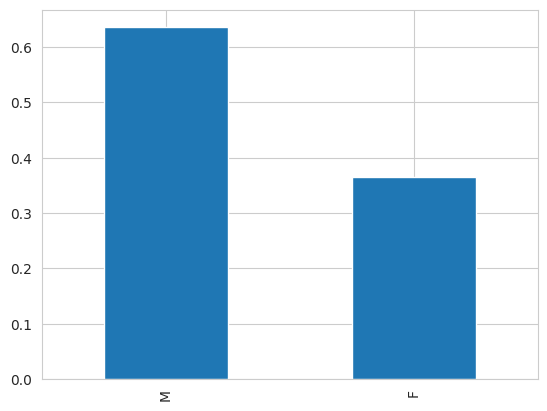

In [60]:
print('Percentage',data.gender.value_counts(normalize=True))
data.gender.value_counts(normalize=True).plot(kind='bar')

In [61]:
data['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

Percentage KW             0.372917
Jordan         0.358333
Palestine      0.058333
Iraq           0.045833
lebanon        0.035417
Tunis          0.025000
SaudiArabia    0.022917
Egypt          0.018750
Syria          0.014583
USA            0.012500
Iran           0.012500
Lybia          0.012500
Morocco        0.008333
venzuela       0.002083
Name: NationalITy, dtype: float64


<Axes: >

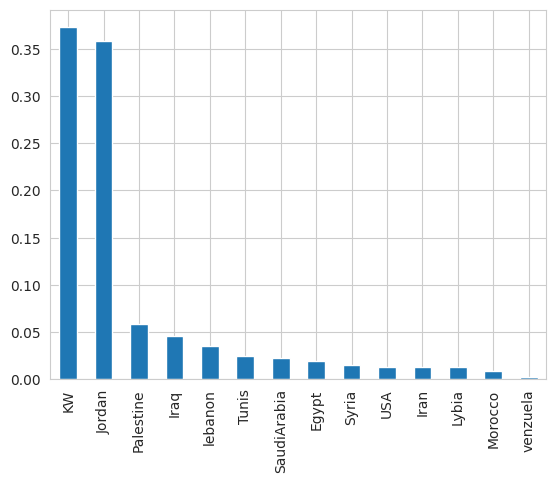

In [62]:
print('Percentage',data.NationalITy.value_counts(normalize=True))
data.NationalITy.value_counts(normalize=True).plot(kind='bar')

Percentage KuwaIT         0.375000
Jordan         0.366667
Iraq           0.045833
lebanon        0.039583
SaudiArabia    0.033333
USA            0.033333
Palestine      0.020833
Egypt          0.018750
Tunis          0.018750
Iran           0.012500
Syria          0.012500
Lybia          0.012500
Morocco        0.008333
venzuela       0.002083
Name: PlaceofBirth, dtype: float64


<Axes: >

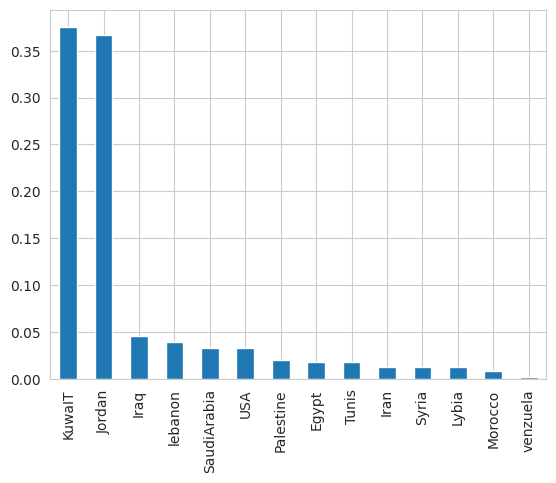

In [63]:
print('Percentage',data.PlaceofBirth.value_counts(normalize=True))
data.PlaceofBirth.value_counts(normalize=True).plot(kind='bar')

In [64]:
data['GradeID'].value_counts()

G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64

Percentage G-02    0.306250
G-08    0.241667
G-07    0.210417
G-04    0.100000
G-06    0.066667
G-11    0.027083
G-12    0.022917
G-09    0.010417
G-10    0.008333
G-05    0.006250
Name: GradeID, dtype: float64


<Axes: >

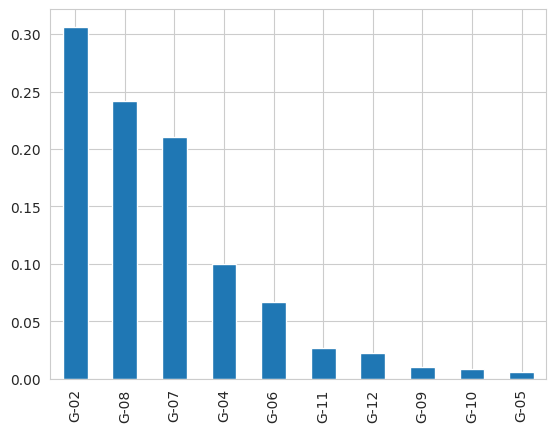

In [65]:
print('Percentage',data.GradeID.value_counts(normalize=True))
data.GradeID.value_counts(normalize=True).plot(kind='bar')

In [66]:
data['Topic'].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

Percentage IT           0.197917
French       0.135417
Arabic       0.122917
Science      0.106250
English      0.093750
Biology      0.062500
Spanish      0.052083
Chemistry    0.050000
Geology      0.050000
Quran        0.045833
Math         0.043750
History      0.039583
Name: Topic, dtype: float64


<Axes: >

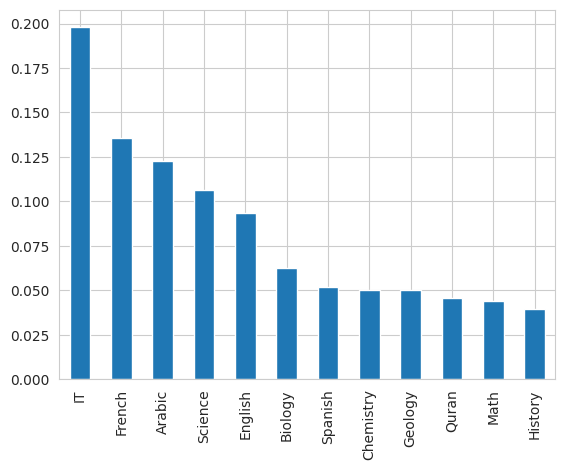

In [67]:
print('Percentage',data.Topic.value_counts(normalize=True))
data.Topic.value_counts(normalize=True).plot(kind='bar')

In [68]:
data['Relation'].value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

Parcentage Father    0.589583
Mum       0.410417
Name: Relation, dtype: float64


<Axes: >

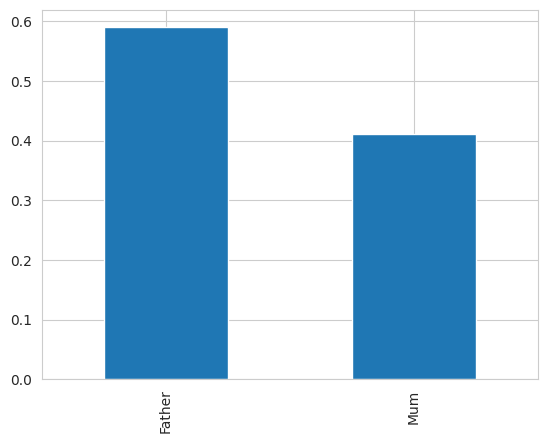

In [69]:
print('Parcentage',data.Relation.value_counts(normalize=True))
data.Relation.value_counts(normalize=True).plot(kind='bar')

In [70]:
data['raisedhands'].value_counts()

10    31
70    31
80    28
72    17
50    17
      ..
61     1
83     1
52     1
67     1
97     1
Name: raisedhands, Length: 82, dtype: int64

<Axes: xlabel='raisedhands', ylabel='Count'>

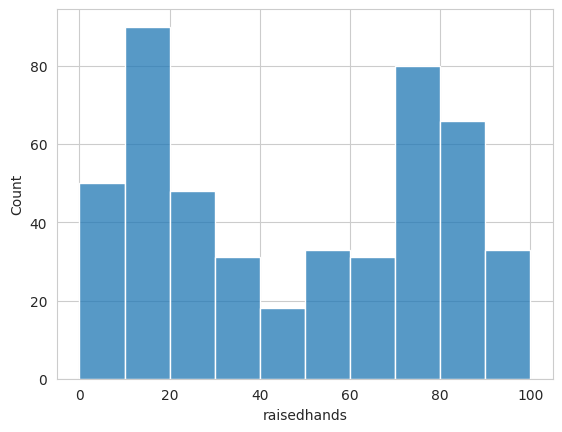

In [71]:
sns.histplot(data['raisedhands'])

In [72]:
data['ParentschoolSatisfaction'].value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

Parcentage Good    0.608333
Bad     0.391667
Name: ParentschoolSatisfaction, dtype: float64


<Axes: >

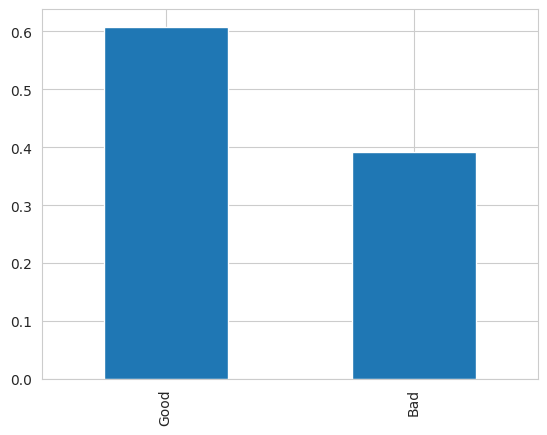

In [73]:
print('Parcentage',data.ParentschoolSatisfaction.value_counts(normalize=True))
data.ParentschoolSatisfaction.value_counts(normalize=True).plot(kind='bar')

In [74]:
data['ParentAnsweringSurvey'].value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

Parcentage Yes    0.5625
No     0.4375
Name: ParentAnsweringSurvey, dtype: float64


<Axes: >

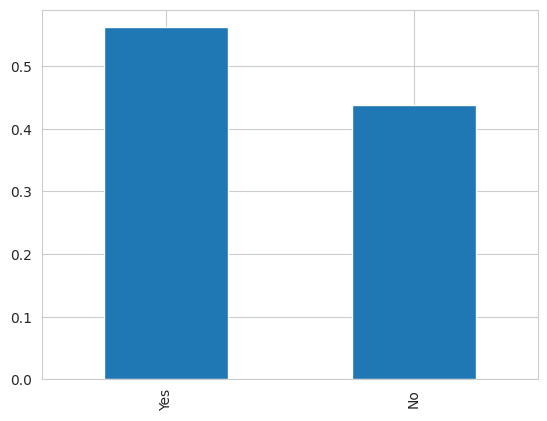

In [75]:
print('Parcentage',data.ParentAnsweringSurvey.value_counts(normalize=True))
data.ParentAnsweringSurvey.value_counts(normalize=True).plot(kind='bar')

In [76]:
data['StudentAbsenceDays'].value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

Parcentage Under-7    0.602083
Above-7    0.397917
Name: StudentAbsenceDays, dtype: float64


<Axes: >

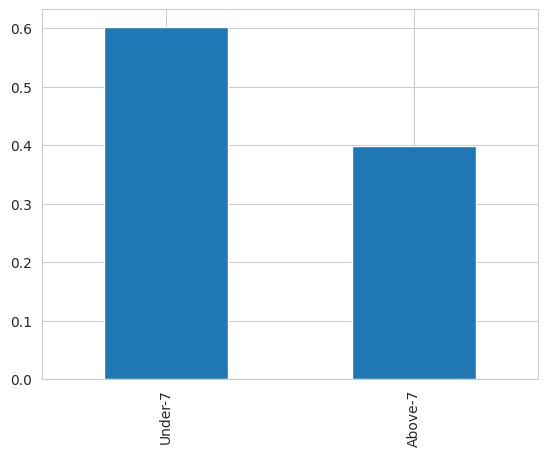

In [77]:
print('Parcentage',data.StudentAbsenceDays.value_counts(normalize=True))
data.StudentAbsenceDays.value_counts(normalize=True).plot(kind='bar')

In [78]:
data['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

Parcentage M    0.439583
H    0.295833
L    0.264583
Name: Class, dtype: float64


<Axes: >

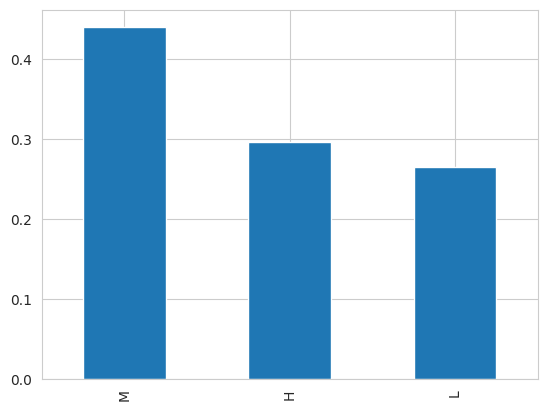

In [79]:
print('Parcentage',data.Class.value_counts(normalize=True))
data.Class.value_counts(normalize=True).plot(kind='bar')

<Axes: xlabel='Semester', ylabel='count'>

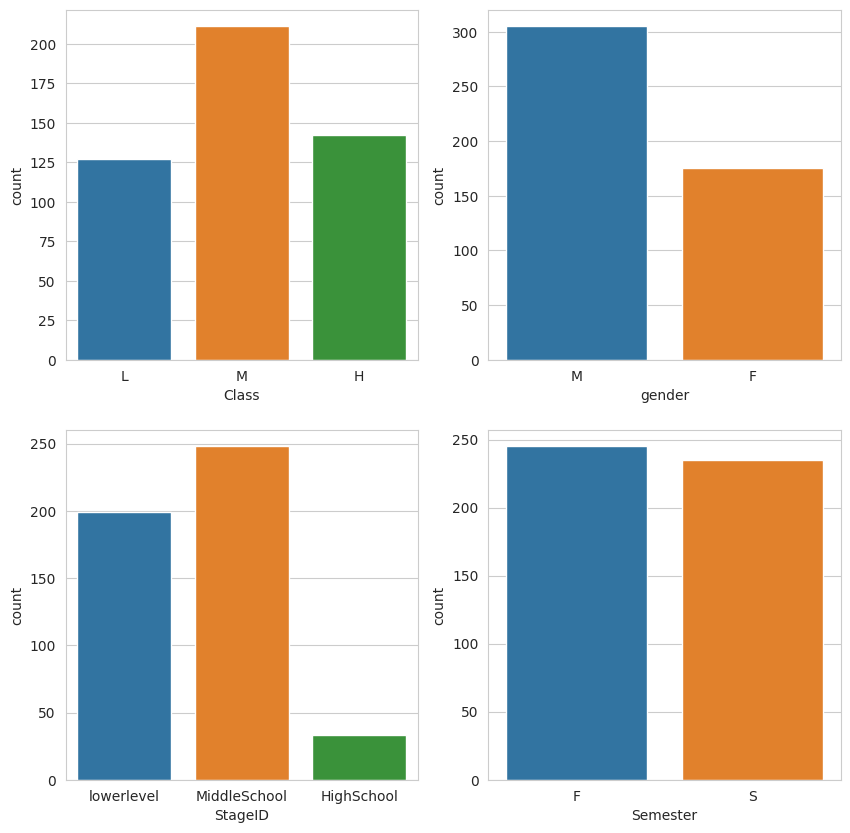

In [80]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Class', data=data, ax=axarr[0,0], order=['L','M','H'])
sns.countplot(x='gender', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='StageID', data=data, ax=axarr[1,0])
sns.countplot(x='Semester', data=data, ax=axarr[1,1])

<Axes: xlabel='gender', ylabel='count'>

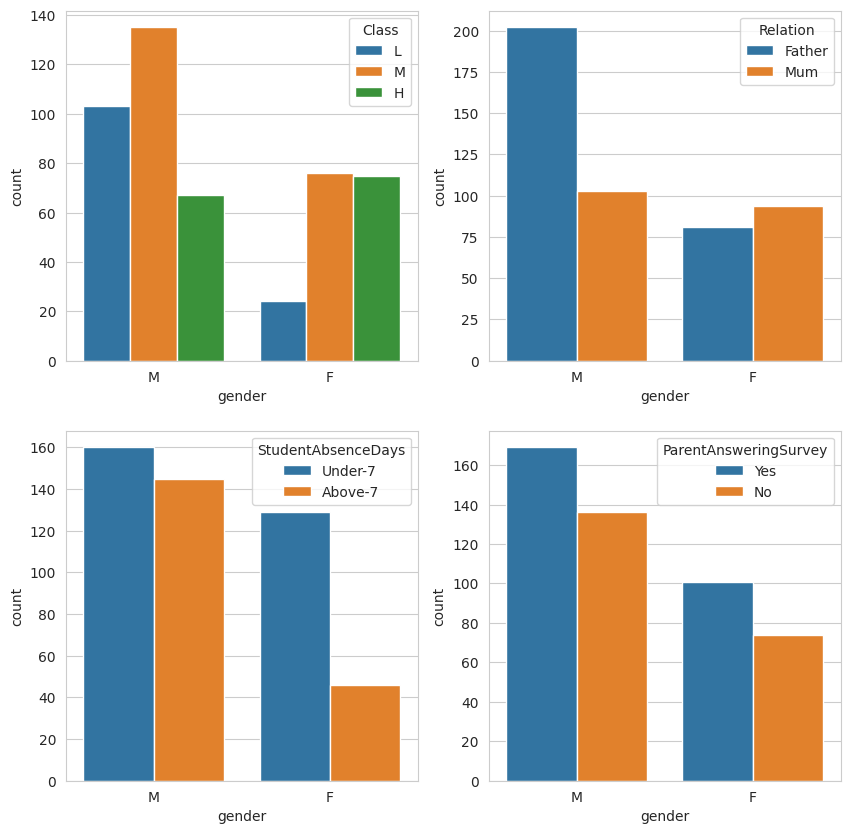

In [81]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='gender', hue='Class', data=data, ax=axarr[0,0], order=['M','F'], hue_order=['L','M','H'])
sns.countplot(x='gender', hue='Relation', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='gender', hue='StudentAbsenceDays', data=data, ax=axarr[1,0], order=['M','F'])
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=data, ax=axarr[1,1], order=['M','F'])

<Axes: xlabel='NationalITy', ylabel='count'>

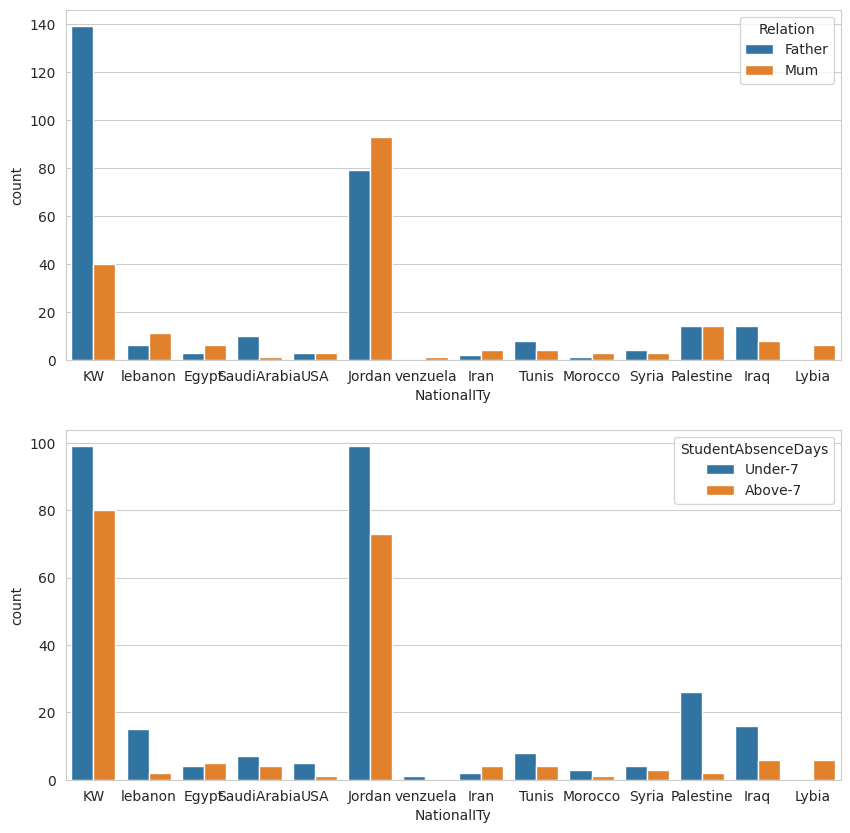

In [82]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='NationalITy', hue='Relation', data=data, ax=axis1)
sns.countplot(x='NationalITy', hue='StudentAbsenceDays', data=data, ax=axis2)

<Axes: xlabel='Class', ylabel='Discussion'>

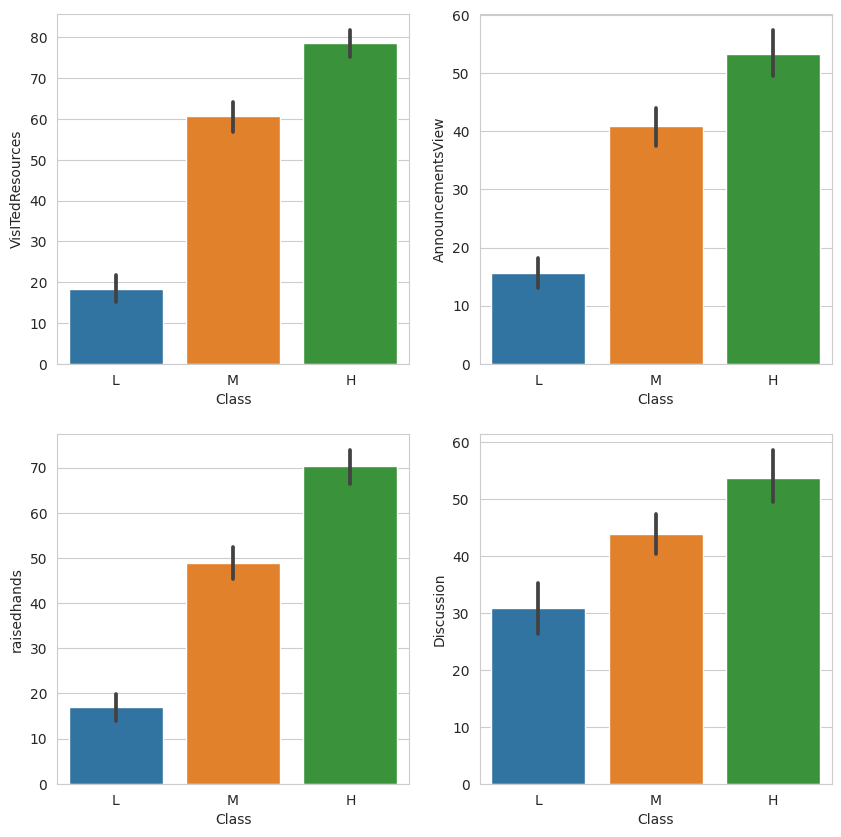

In [83]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisITedResources', data=data, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=data, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', data=data, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=data, order=['L','M','H'], ax=axarr[1,1])

<Axes: xlabel='Class', ylabel='VisITedResources'>

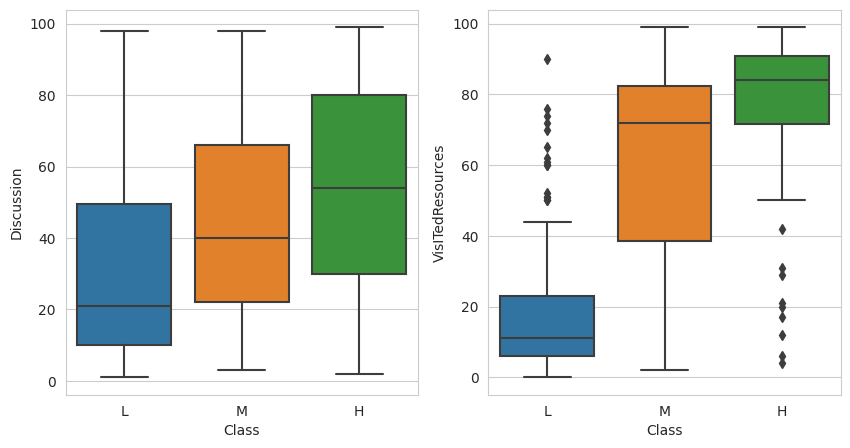

In [84]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.boxplot(x='Class', y='Discussion', data=data, order=['L','M','H'], ax=axis1)
sns.boxplot(x='Class', y='VisITedResources', data=data, order=['L','M','H'], ax=axis2)

<Axes: xlabel='Semester', ylabel='AnnouncementsView'>

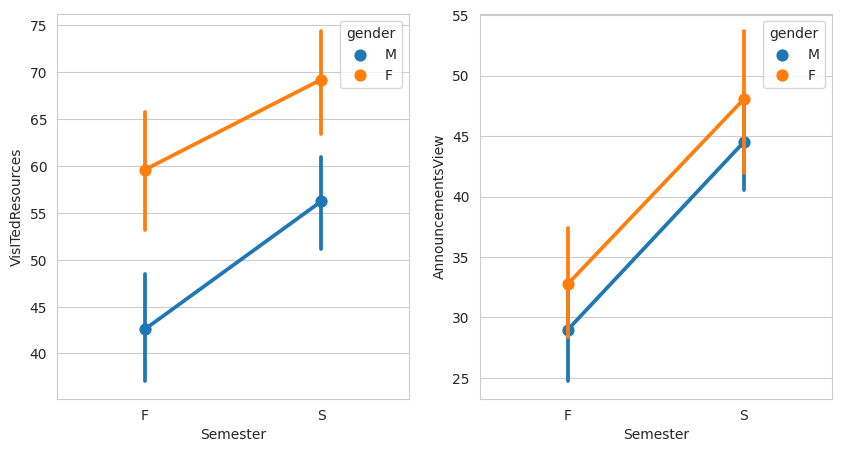

In [85]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Semester', y='VisITedResources', hue='gender', data=data, ax=axis1)
sns.pointplot(x='Semester', y='AnnouncementsView', hue='gender', data=data, ax=axis2)

<Axes: xlabel='AnnouncementsView', ylabel='Discussion'>

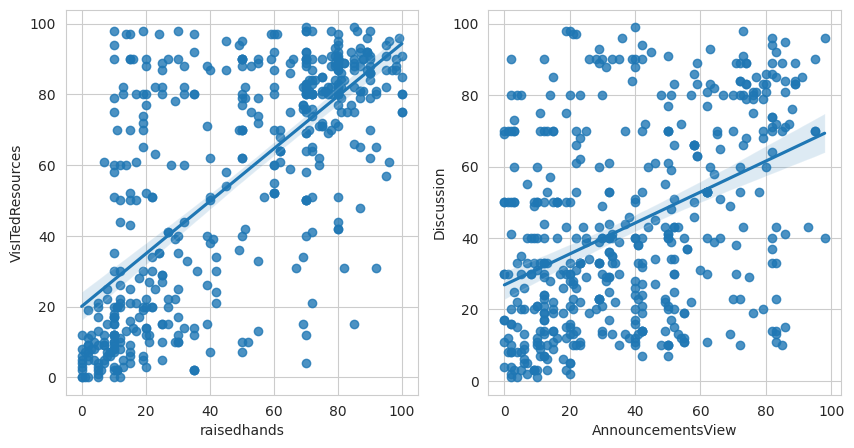

In [86]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.regplot(x='raisedhands', y='VisITedResources', data=data, ax=axis1)
sns.regplot(x='AnnouncementsView', y='Discussion', data=data, ax=axis2)

In [87]:
Features = data.drop('gender',axis=1)
Target = data['gender']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])


In [88]:
Features = data.drop('Semester',axis=1)
Target = data['Semester']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [89]:
Features = data.drop('ParentAnsweringSurvey',axis=1)
Target = data['ParentAnsweringSurvey']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [90]:
Features = data.drop('Relation',axis=1)
Target = data['Relation']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [91]:
Features = data.drop('ParentschoolSatisfaction',axis=1)
Target = data['ParentschoolSatisfaction']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [92]:
Features = data.drop('StudentAbsenceDays',axis=1)
Target = data['StudentAbsenceDays']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [101]:
Features = data.drop('Class',axis=1)
Target = data['Class']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

print( Features[col])

0      1
1      1
2      0
3      0
4      0
      ..
475    0
476    1
477    1
478    0
479    0
Name: StudentAbsenceDays, Length: 480, dtype: int64


In [94]:
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=52)

In [95]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [98]:
Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)
print(Report)

              precision    recall  f1-score   support

           H       0.93      0.74      0.83        35
           L       0.76      0.86      0.81        22
           M       0.74      0.82      0.78        39

    accuracy                           0.80        96
   macro avg       0.81      0.81      0.80        96
weighted avg       0.82      0.80      0.80        96



In [97]:
print(Score)

0.8020833333333334


In [103]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [121]:
Features = X_test.drop('Class',axis=1)
Target = X_test['Class']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

print( Features[col])

KeyError: ignored

In [104]:
xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100,seed=10)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)

In [107]:
le = LabelEncoder()
y_train = le.fit_transform(y_test)